In [2]:
# Importing dependencies
import torch
from torch import nn

torch.__version__

'2.2.0+cpu'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print("Already exists so skipping downloading")
else:
  print("Doesnt exist so downloading")
  image_path.mkdir(parents=True,
                   exist_ok=True)

with open(data_path/ "pizza_steak_sushi.zip", 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping")
  zip_ref.extractall(image_path)


Already exists so skipping downloading
Unzipping


In [5]:
import os
def walk_through_dir(dir_path):
  for dirpath, dir_names, filenames in os.walk(dir_path):
    print(f"THERE ARE {len(dir_names)} DIRECTORIES AND {len(filenames)} IMAGES IN '{dirpath} .")

In [6]:
walk_through_dir(image_path)

THERE ARE 2 DIRECTORIES AND 0 IMAGES IN 'data\pizza_steak_sushi .
THERE ARE 3 DIRECTORIES AND 0 IMAGES IN 'data\pizza_steak_sushi\test .
THERE ARE 0 DIRECTORIES AND 25 IMAGES IN 'data\pizza_steak_sushi\test\pizza .
THERE ARE 0 DIRECTORIES AND 19 IMAGES IN 'data\pizza_steak_sushi\test\steak .
THERE ARE 0 DIRECTORIES AND 31 IMAGES IN 'data\pizza_steak_sushi\test\sushi .
THERE ARE 3 DIRECTORIES AND 0 IMAGES IN 'data\pizza_steak_sushi\train .
THERE ARE 0 DIRECTORIES AND 78 IMAGES IN 'data\pizza_steak_sushi\train\pizza .
THERE ARE 0 DIRECTORIES AND 75 IMAGES IN 'data\pizza_steak_sushi\train\steak .
THERE ARE 0 DIRECTORIES AND 72 IMAGES IN 'data\pizza_steak_sushi\train\sushi .


In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir


(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [8]:
image_path

WindowsPath('data/pizza_steak_sushi')

Image path :data\pizza_steak_sushi\test\sushi\1987407.jpg
Image class : sushi
Image height : 384
Image width : 512


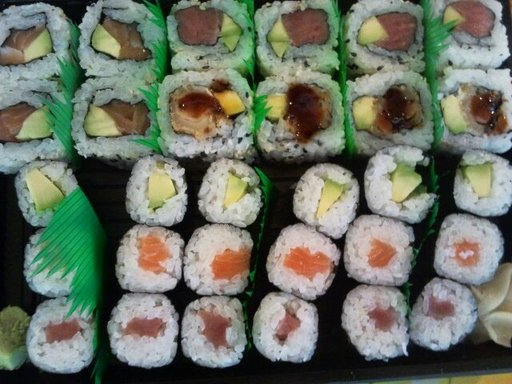

In [21]:
import random
from PIL import Image
#random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)


image_class =random_image_path.parent.stem
 
img = Image.open(random_image_path)

print(f"Image path :{random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height : {img.height}")
print(f"Image width : {img.width}")
img

In [13]:
random_image_path = random.choice(image_path_list)
random_image_path

image_class =random_image_path.parent.stem
image_class
img = Image.open(random_image_path)


'pizza'

(-0.5, 511.5, 383.5, -0.5)

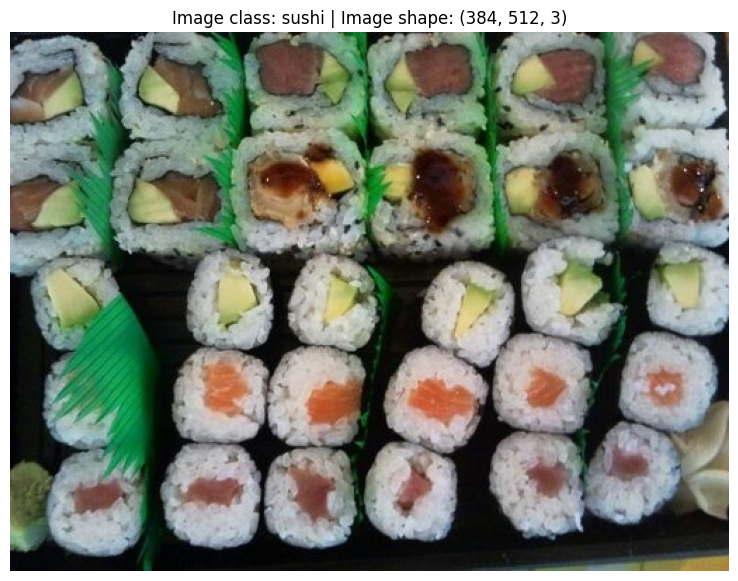

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#turning img to array
img_array = np.asarray(img)

#plotting the img
plt.figure(figsize = (10,7))
plt.imshow(img_array)
plt.title(f"Image class: {image_class} | Image shape: {img_array.shape}")
plt.axis(False)